In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator

In [2]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
print(df.head())

                     id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,

In [3]:
#Describing the Dataset

data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,2.900000e+01,5000.000000,5000.000000
mean,1.858740e+08,0.312400,4.596800
std,2.084040e+07,3.111582,0.731804
min,1.082112e+08,0.000000,1.000000
25%,1.851185e+08,0.000000,4.000000
50%,1.880757e+08,0.000000,5.000000
75%,1.981949e+08,0.000000,5.000000
max,2.027812e+08,105.000000,5.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [5]:
data["asins"].unique()

array(['B00ZV9PXP2', 'B010CEHQTG', 'B01J24C0TI', 'B01N32NCPM',
       'B06XB29FPF', 'B00QFQRELG', 'B018Y22C2Y', 'B017JG41PC',
       'B018Y22BI4', 'B018Y23MNM', 'B01AHBBG04', 'B01AHBDCKQ',
       'B01BH83OOM', 'B0189XYY0Q', 'B00VINDBJK', 'B00IOY8XWQ',
       'B01AHB9CN2', 'B018Y225IA', 'B00IOYAM4I', 'B01AHB9C1E',
       'B00REQKWGA', 'B01ACEKAJY', 'B01AHB9CYG', 'B018Y224PY'],
      dtype=object)

In [6]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 24


In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["reviews.rating"]):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Before 5000
After 5000


In [8]:
print(len(strat_train))
print(len(strat_test))
print(strat_test["reviews.rating"].value_counts()/len(strat_test))

4000
1000
5    0.695
4    0.242
3    0.039
1    0.013
2    0.011
Name: reviews.rating, dtype: float64


In [9]:
#Data Exploration

reviews = strat_train.copy()
reviews.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
2555,AVpgdkC8ilAPnD_xsvyi,2016-04-10T22:00:34Z,2018-09-21T18:45:21Z,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",B018Y22BI4,Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,http://i.ebayimg.com/thumbs/images/g/3MIAAOSwo...,amazonfire16gb5thgen2015releaseblack/272201222...,...,"2017-09-03T00:00:00Z,2017-08-27T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5023200/review...,Bought this to carry around for Internet and g...,1st time user,Lakle,http://reviews.bestbuy.com/3545/5023200/review...
4118,AVqkIhwDv8e3D1O-lebb,2017-03-06T14:59:43Z,2018-02-13T21:53:06Z,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,https://i5.walmartimages.com/asr/c494506a-b347...,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,2017-06-07T09:03:00.000Z,True,NaN,0,5,http://reviews.bestbuy.com/3545/5620406/review...,I bought this tab for my daughter's birthday.i...,Awesome little tab!,Maggie,http://www.walmart.com/ip/All-New-Fire-HD-8-Ta...
807,AWK8z0pOIwln0LfXlSxH,2018-04-13T02:03:15Z,2018-10-15T15:46:03Z,Amazon Echo Show Alexa-enabled Bluetooth Speak...,B01J24C0TI,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",https://pisces.bbystatic.com/image2/BestBuy_US...,amazonechoshowsmartspeakerwithalexablack/58756...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5875662/revie...,Great product and it is very easy to set up an...,love it,tc13,https://reviews.bestbuy.com/3545/5875662/revie...
4170,AVqkIhwDv8e3D1O-lebb,2017-03-06T14:59:43Z,2018-02-13T21:53:06Z,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,https://i5.walmartimages.com/asr/c494506a-b347...,"841667104676,amazon/53004484,amazon/b01ahb9cn2...",...,2017-06-07T09:03:00.000Z,True,NaN,0,5,http://reviews.bestbuy.com/3545/5620406/review...,This screen on the hd8 is a huge improvement o...,Great hd screen,julio,http://www.walmart.com/ip/All-New-Fire-HD-8-Ta...
983,AWMjT0WguC1rwyj_rFh3,2018-05-02T14:01:51Z,2018-09-21T19:44:16Z,Amazon - Echo Plus w/ Built-In Hub - Silver,B06XB29FPF,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",https://pisces.bbystatic.com/image2/BestBuy_US...,amazonamazonechoplussmartspeakerwithalexaphili...,...,2018-04-26T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/6036024/revie...,"bought this as a present for the wife, but as ...",like a personal concierge,classicman,https://www.newegg.com/Product/Product.aspx%25...


In [10]:
##

print(len(reviews["name"].unique()), len(reviews["asins"].unique()))
print(reviews.info())
print(reviews.groupby("asins")["name"].unique())

23 24
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 2555 to 4562
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4000 non-null   object 
 1   dateAdded            4000 non-null   object 
 2   dateUpdated          4000 non-null   object 
 3   name                 4000 non-null   object 
 4   asins                4000 non-null   object 
 5   brand                4000 non-null   object 
 6   categories           4000 non-null   object 
 7   primaryCategories    4000 non-null   object 
 8   imageURLs            4000 non-null   object 
 9   keys                 4000 non-null   object 
 10  manufacturer         4000 non-null   object 
 11  manufacturerNumber   4000 non-null   object 
 12  reviews.date         4000 non-null   object 
 13  reviews.dateAdded    838 non-null    object 
 14  reviews.dateSeen     4000 non-null   object 
 15  reviews.doRecommend  4000 non

In [11]:
##Lets see all the different names for this product that have 2 ASINs:

different_names = reviews[reviews["asins"] ==
                          "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)
print(reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts())

Series([], Name: name, dtype: int64)


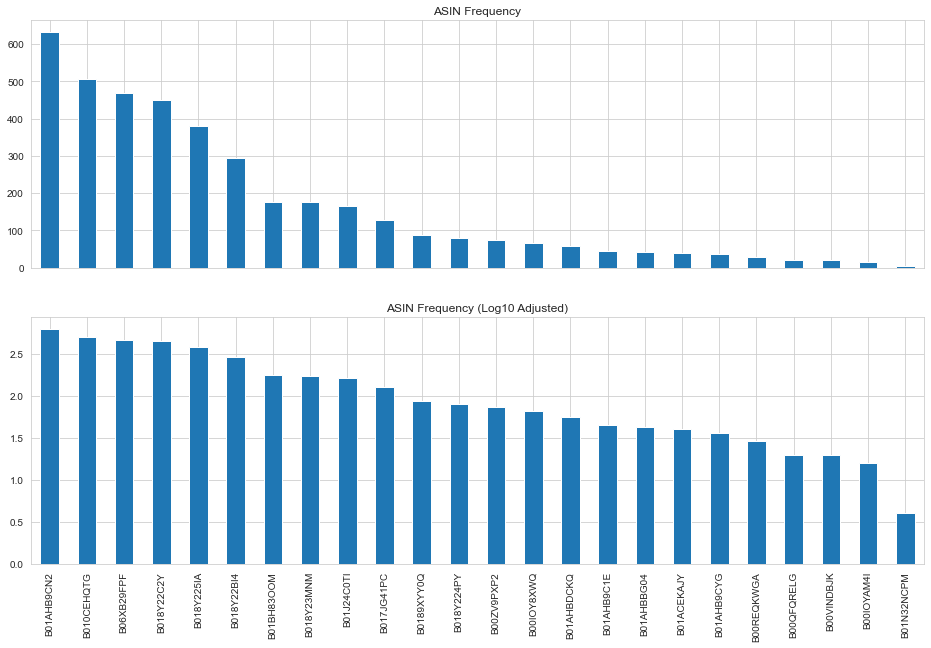

In [12]:
##The output confirmed that each ASIN can have multiple names.

fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
plt.show()

4.59725


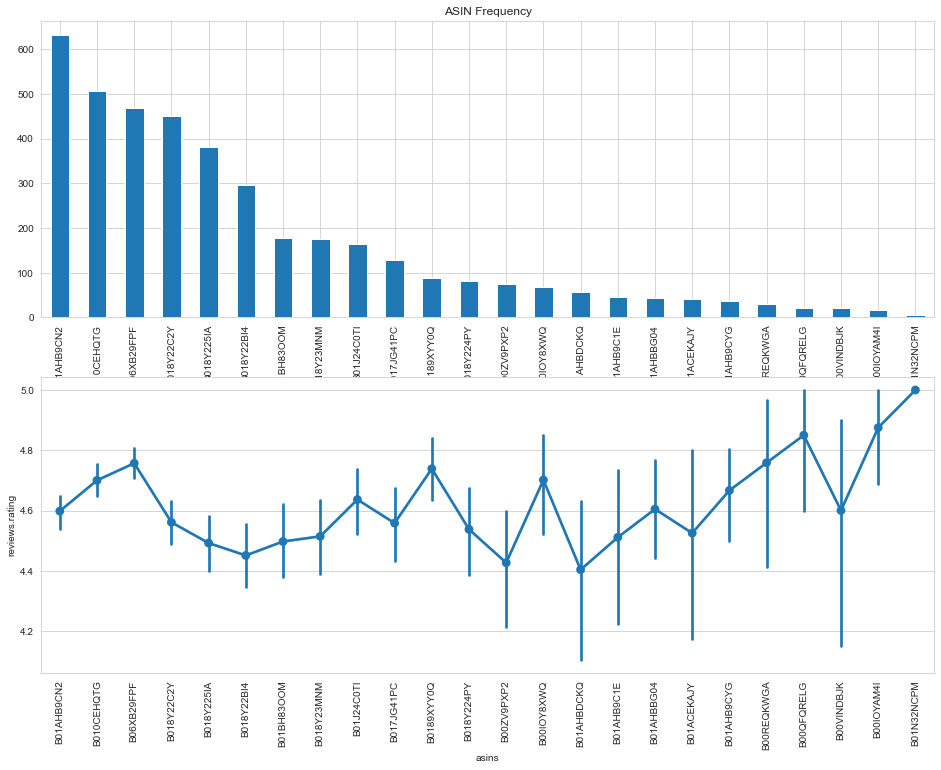

In [13]:
#Entire training dataset average rating

print(reviews["reviews.rating"].mean())

asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [14]:
##Sentiment Analysis

def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
print(strat_train["Sentiment"][:20])

2555    Positive
4118    Positive
807     Positive
4170    Positive
983     Positive
861      Neutral
1985    Positive
1674    Positive
4276    Positive
3031    Positive
4167    Positive
2683    Positive
4866    Positive
3565    Positive
4451    Positive
3412    Positive
1374    Positive
3344    Positive
2754    Positive
2537    Positive
Name: Sentiment, dtype: object
